# A/B testing Igneous Geochemistry Data

### Import scientific python libraries

Including the seaborn library that we will be using for the first time today.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Visualizing distributions of data and comparing populations

Today we are going to move to dealing with a different type of data -- igneous geochemistry data. Igneous rocks are those that crystallize from cooling magma. Different magmas have different compositions associated with their origin. During class today, we will focuse on data from lava flows (these are called volcanics rocks). In the homework we will apply the same skills to air pollution data.

There is a big database of geochemical data from rocks called Earthchem: https://www.earthchem.org

### Import a dataframe of igneous geochemistry data

Let's deal with a subset of data from Earthchem that contains geochemical data from igneous rocks. In the data folder in a file calles `ign.csv` although it is actually tab-separated. It comes from here: https://github.com/brenhinkeller/StatisticalGeochemistry

<font color=goldenrod>**_Code for you to write_**</font>

- Take a look at `ign.csv` which is in `data/`. 
- Read in `ign.csv` using the separator argument `sep='\t'`, and save this to dataframe `igneous data`.
- If there is an error message, follow its instructions and try again.

In [2]:
igneaous_data = pd.read_csv('data/ign.csv',sep='\t')

/tmp/ipykernel_477651/2440562436.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  igneaous_data = pd.read_csv('data/ign.csv',sep='\t')


Let's look at what data are available.

<font color=goldenrod>**_Code for you to write_**</font>
- Use the `.columns` method on `igneous_data` to show the columns in the dataset

In [3]:
igneaous_data.columns

Index(['ID', 'SAMPLE ID', 'SOURCE', 'REFERENCE', 'LOCALITY', 'METHODS',
       'MATERIAL', 'TYPE', 'COMPOSITION', 'ROCK NAME', 'ID.1', 'LATITUDE',
       'LONGITUDE', 'LOC PREC', 'MIN AGE', 'MAX AGE', 'AGE', 'SIO2', 'TIO2',
       'AL2O3', 'FE2O3', 'FE2O3T', 'FEO', 'FEOT', 'MGO', 'CAO', 'NA2O', 'K2O',
       'P2O5', 'MNO', 'H2O_TOTAL', 'LA', 'CE', 'PR', 'ND', 'SM', 'EU', 'GD',
       'TB', 'DY', 'HO', 'ER', 'TM', 'YB', 'LU', 'LI', 'BE', 'B', 'C', 'CO2',
       'F', 'CL', 'SC', 'TI', 'V', 'CR', 'CO', 'NI', 'CU', 'ZN', 'GA', 'ZR',
       'OS', 'RB', 'BI', 'HG', 'BA', 'Y', 'PB', 'TE', 'NB', 'SR87_SR86', 'TL',
       'PT', 'SN', 'CD', 'AS', 'PD', 'SR', 'SE', 'S', 'AU', 'TA', 'MO', 'U',
       'CS', 'SB', 'AG', 'W', 'TH', 'RE', 'HF', 'IR'],
      dtype='object')

Lots of different geochemical data. Note that the major elements are given as weight percent and the the minor elements are parts per million (ppm).

## Filter to look at volcanics

Let's make it so that we are only dealing with the data from **VOLCANIC** rocks. Filter using the **'TYPE'** key.

<font color=goldenrod>**_Code for you to write_**</font>

In [4]:
volcanic_data=igneaous_data[igneaous_data['TYPE']=='VOLCANIC']
volcanic_data.head()

,ID,SAMPLE ID,SOURCE,REFERENCE,LOCALITY,METHODS,MATERIAL,TYPE,COMPOSITION,ROCK NAME,ID.1,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,MAX AGE,AGE,SIO2,TIO2,AL2O3,FE2O3,FE2O3T,FEO,FEOT,MGO,CAO,NA2O,K2O,P2O5,MNO,H2O_TOTAL,LA,CE,PR,ND,SM,EU,GD,TB,DY,HO,ER,TM,YB,LU,LI,BE,B,C,CO2,F,CL,SC,TI,V,CR,CO,NI,CU,ZN,GA,ZR,OS,RB,BI,HG,BA,Y,PB,TE,NB,SR87_SR86,TL,PT,SN,CD,AS,PD,SR,SE,S,AU,TA,MO,U,CS,SB,AG,W,TH,RE,HF,IR
0,KV68702,D102672,USGS,"USGS, 2004",NaN,UNKNOWN,IGNEOUS,VOLCANIC,MAFIC,BASALT,68702,19.25,-155.13,0.01,0.0,0.01,0.01,49.97,2.57,13.11,1.83,12.49892,9.60,NaN,9.06,10.58,2.24,0.47,0.26,0.17,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,0.02,0.04,0.01,50.0,1.00,500.0,500.0,50.0,200.0,150.0,NaN,30.0,150.0,NaN,NaN,NaN,NaN,150.0,50.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KV68698,W250537,USGS,"USGS, 2004",NaN,WDXRF; TITR; INAA; ICPAES; GRAV; FIS; EDXRF; AAS,IGNEOUS,VOLCANIC,MAFIC,BASALT,68698,38.63,-77.79,0.01,144.0,206.00,175.00,49.90,1.11,13.90,NaN,13.70000,9.00,NaN,6.65,9.46,2.76,0.76,0.13,0.21,NaN,8.8,18.0,NaN,11.0,3.20,1.02,NaN,0.70,NaN,NaN,NaN,NaN,3.10,0.45,18.0,NaN,NaN,NaN,0.04,NaN,NaN,43.8,0.67,351.0,84.2,50.3,32.0,130.0,100.0,19.0,91.0,NaN,27.00,NaN,NaN,240.0,27.0,6.0,NaN,3.9,NaN,NaN,8.6,NaN,NaN,NaN,8.5,240.0,NaN,NaN,6.6,0.31,NaN,0.43,0.40,NaN,NaN,NaN,1.90,NaN,2.50,NaN
5,KV68697,W250536,USGS,"USGS, 2004",NaN,WDXRF; TITR; INAA; ICPAES; GRAV; FIS; EDXRF; AAS,IGNEOUS,VOLCANIC,MAFIC,BASALT,68697,38.63,-77.79,0.01,144.0,206.00,175.00,49.90,1.05,13.80,NaN,12.90000,8.60,NaN,6.24,8.88,3.77,0.60,0.12,0.22,NaN,7.7,17.0,NaN,9.2,2.94,0.97,NaN,0.69,NaN,NaN,NaN,NaN,2.70,0.38,20.0,NaN,NaN,NaN,0.48,NaN,NaN,41.6,0.66,354.0,72.6,47.9,51.0,159.0,95.0,18.0,82.0,NaN,19.00,NaN,NaN,170.0,25.0,5.0,NaN,3.5,NaN,NaN,12.0,NaN,NaN,NaN,4.6,350.0,NaN,NaN,6.4,0.27,NaN,0.77,0.53,NaN,NaN,NaN,1.90,NaN,2.20,NaN
14,KV68688,M199970,USGS,"USGS, 2004",NaN,WDXRF; TITR; INAA; ICPAES; GRAV; FIS; EDXRF; AAS,IGNEOUS,VOLCANIC,MAFIC,BASALT,68688,57.45,-133.92,0.01,65.0,248.00,156.50,49.90,1.34,16.10,NaN,7.84000,4.36,NaN,8.82,6.72,4.49,0.70,0.13,0.10,NaN,4.8,12.0,NaN,7.7,2.59,0.97,3.00,0.43,NaN,NaN,NaN,NaN,1.20,0.18,NaN,NaN,NaN,NaN,0.68,NaN,NaN,43.2,NaN,300.0,266.0,36.0,80.0,78.0,190.0,NaN,98.0,NaN,9.40,NaN,NaN,150.0,24.0,NaN,NaN,10.0,NaN,NaN,6.5,NaN,NaN,1.7,9.8,380.0,NaN,0.01,NaN,0.40,NaN,NaN,0.22,NaN,NaN,NaN,0.50,NaN,2.10,NaN
16,KV68686,M180720,USGS,"USGS, 2004",NaN,WDXRF; TITR; INAA; ICPAES; GRAV; EDXRF,IGNEOUS,VOLCANIC,MAFIC,BASALT,68686,60.06,-160.39,0.01,65.0,248.00,156.50,49.90,0.86,15.70,NaN,10.90000,7.49,NaN,4.10,6.38,5.10,1.14,0.28,0.24,NaN,10.9,25.7,NaN,13.9,3.35,1.00,3.97,0.54,NaN,NaN,NaN,0.34,2.19,0.31,NaN,NaN,NaN,NaN,1.76,NaN,NaN,31.7,NaN,270.0,14.1,26.6,9.9,NaN,81.7,NaN,90.1,NaN,9.99,NaN,NaN,1300.0,20.0,NaN,NaN,8.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN,NaN,0.49,NaN,0.61,0.22,NaN,NaN,NaN,1.53,NaN,2.01,NaN


## Visualizing the data

A type of visualization we have used a fair amount are histograms. Let's plot up how much SiO$_2$ there is in the volcanics rocks that are in the Earthchem database.

<font color=goldenrod>**_Code for you to write_**</font>
- Plot a histogram of `'SIO2'` in `volcanic data`
- Choose some number of bins
- Add labels and a title like normal

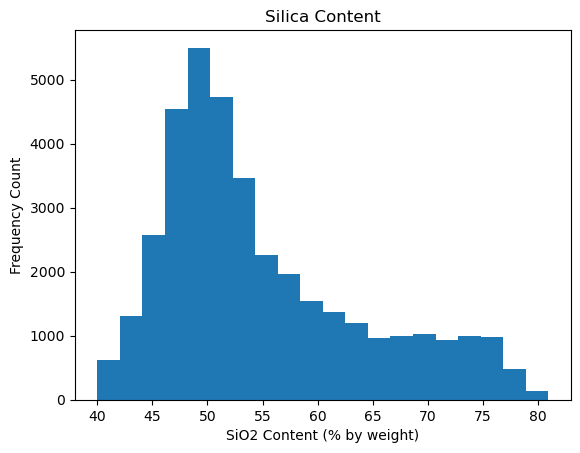

In [5]:
plt.hist(volcanic_data['SIO2'], bins=20)# ,#density=True)
plt.title(f'Silica Content')
plt.xlabel('SiO2 Content (% by weight)')
plt.ylabel('Frequency Count')
plt.show()

Recall that instead of having the y-axis be number of values, we can have it be density using `density=True` (normalized to form a probability density, i.e., the area (or integral) under the histogram will sum to 1). Given that the count itself is rather arbitary, this can be an advantageous way to plot a distribution.

<font color=goldenrod>**_Code for you to write_**</font>
- Repeat the plot from above
- Use a different number of bins, much smaller or much larger
- Make it a probabilitiy density plot with argument `density=True`

<font color=red>**_Discussion Question_**</font> How does the number of bins change the ability to interpret the data?

<font color=blue>**_Answer_**</font> It shows more detail and slightly different distribution. 



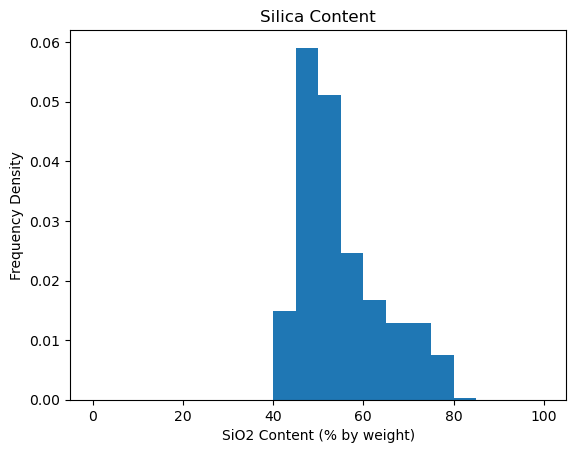

In [6]:
plt.hist(volcanic_data['SIO2'], bins=np.arange(0,101, 5), density=True)
plt.title(f'Silica Content')
plt.xlabel('SiO2 Content (% by weight)')
plt.ylabel('Frequency Density')
plt.show()

## Kernel density estimate

One of the ways of representing the distribution of a set of datapoints is known as the 'kernel density estimate'. This is a useful way of showing the distribution of data. It places a 'kernel' (generally a normal distribution) at each data point and then sums them up.  

**This avoids the awkwardness of needing to chose a bin size associated with histograms, for example.**

Here is an illustration of how this works.

<img src="images/kde.png" width = 800 >

[Source: https://commons.wikimedia.org/wiki/File:Comparison_of_1D_histogram_and_KDE.png Wikimedia Creative Commons] 


There are two choices that are consequential when developing a kernel density estimate: the shape of the "kernel" and the **bandwidth** that sets the width of the kernel. The shape doesn't end up mattering too much, **but the bandwidth very much does**. There are "rules of thumb" for the bandwidth that are implemented as the **defaults** (and therefore often used), but these can be adjusted and it often isn't clear what the "right choice" is.

<img src="images/Comparison_of_1D_bandwidth_selectors.png" width = 600  >
<figcaption align = "center"> Kernel density estimate (KDE) with different bandwidths of a random sample of 100 points from a standard normal distribution. Grey: true density (standard normal). Red: KDE with h=0.05. Black: KDE with h=0.337. Green: KDE with h=2. </figcaption>


By <a href="https://en.wikipedia.org/wiki/User:Drleft" class="extiw" title="en:User:Drleft">User:Drleft</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=73892711">Link</a>

### Developing a kernel density estimate with ```kdeplot```

The seaborn function ```kdeplot``` generates a kernal density estimate and then plots it. Note that seaborn provides convenience wrapper functions around other scientific python packages. It is using matplotlib for plotting and it is using statsmodels, scipy and numpy for the statistical methods. It combines these into functions that can quickly get these tasks done. The default is a gaussian kernel and Scott's rule of thumb for the bandwidth.

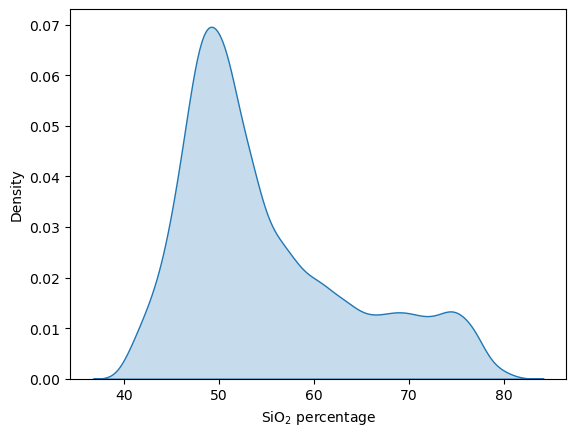

In [7]:
sns.kdeplot(volcanic_data['SIO2'],fill=True)
plt.xlabel('SiO$_2$ percentage')
plt.ylabel('Density')
plt.show()

The `sns.histplot` function will plot both a density-normalized histogram and a kernel density estimate curve.

<font color=goldenrod>**_Code for you to write_**</font>
- Use `sns.histplot` to plot `volcanic_data['SIO2']`
- Use arguments `kde=True` and `stat="density"`
- Add labels and title

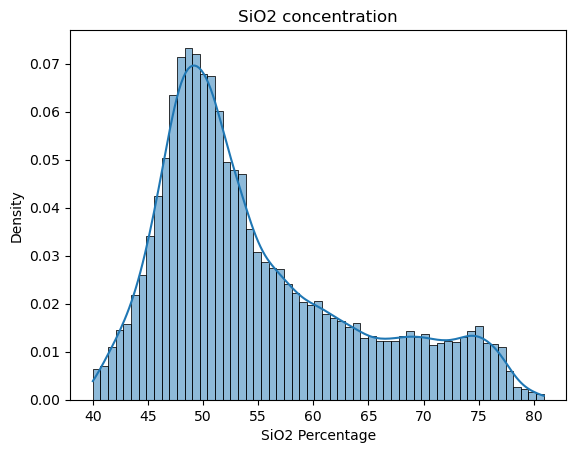

In [8]:
sns.histplot(volcanic_data['SIO2'], kde=True, stat="density")
plt.title('SiO2 concentration')
plt.xlabel('SiO2 Percentage')
plt.ylabel('Density')
plt.show()

## Making a bivariant histogram/scatter plot

If we want to investigate how another aspect of the chemistry of volcanic rocks relates to silica content we can use `sns.joinplot` to make a cross-plot. Here let's look at how iron content (FeO) relates to silica content. These are useful when dealing with **continuous variables**, i.e. a number that can take any value within some range.

First, let's look at the docstring for `sns.jointplot`

In [9]:
sns.jointplot?

Signature:
sns.jointplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    kind='scatter',
    height=6,
    ratio=5,
    space=0.2,
    dropna=False,
    xlim=None,
    ylim=None,
    color=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    marginal_ticks=False,
    joint_kws=None,
    marginal_kws=None,
    **kwargs,
)
Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset that will be internally
    reshaped.
x, y : vectors or keys in ``data``
    Variables that s

<font color=goldenrod>**_Code for you to write_**</font>
- Read the docstring
- Use `sns.jointplot` to plot SIO2 against FEO from the `volcanic_data` dataframe

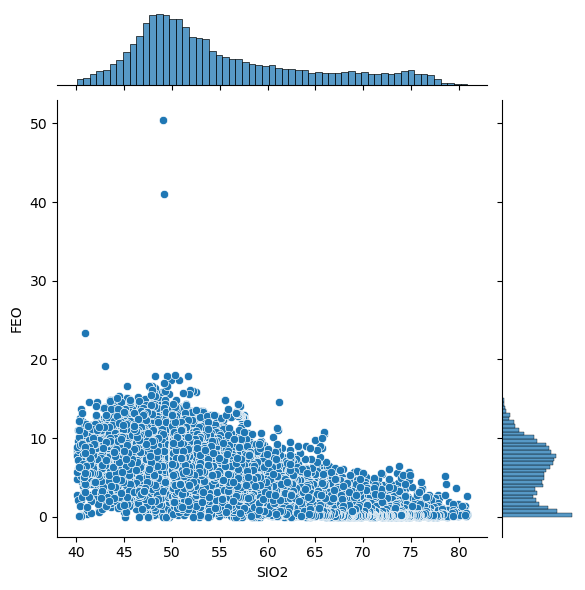

In [10]:
sns.jointplot(data = volcanic_data, x='SIO2', y='FEO')


plt.show()

Pretty hard to see what is going on there. Perhaps it will be better if we change the **y limit** so that it is tighter on the data and make the symbols have **a transparency**.

<font color=goldenrod>**_Code for you to write_**</font>
- Repeat the plot from above and add transparency with the argument `alpha=0.1`

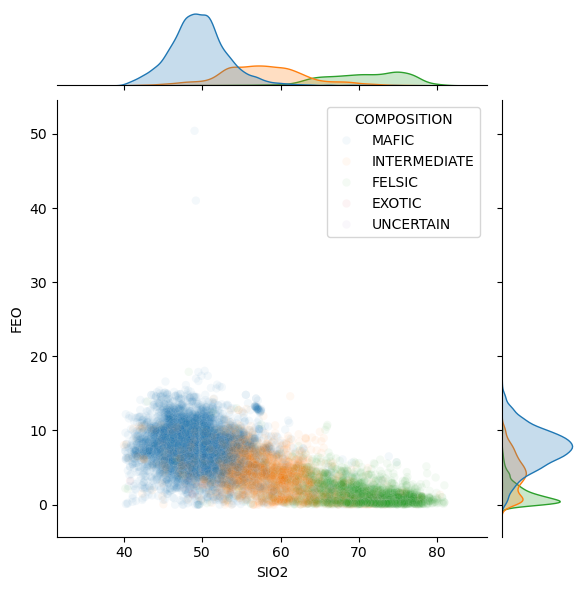

In [11]:
sns.jointplot(data = volcanic_data, x='SIO2', y='FEO', hue='COMPOSITION', alpha=0.05)


plt.show()

## Making a bivariant kernel density plot

Still pretty hard to see what is going on in the above plot, but it is an improvement. Let's put kernel density estimates to use. Here the same kernel density estimate is used and shown for the univariate data on each axis. However, we now have a bivariate kernel density estimate as well. Taken together we can see that there is a strong relationship between SiO$_2$ levels and FeO levels in volcanic rocks.

<font color=goldenrod>**_Code for you to write_**</font>
- Repeat the plot from above and make the plot a KDE with the argument `kind=kde`

/opt/tljh/user/lib/python3.12/site-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/opt/tljh/user/lib/python3.12/site-packages/seaborn/axisgrid.py:1889: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


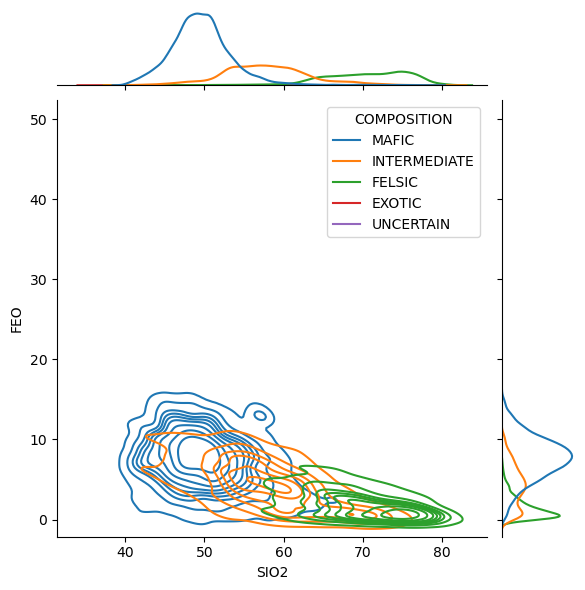

In [12]:
sns.jointplot(data = volcanic_data, x='SIO2', y='FEO', hue='COMPOSITION', kind='kde')


plt.show()

## Mafic vs. felsic

This illustration provides an overview of the compositional difference between different types of igneous rocks:

<img src="images/mafic_felsic.jpg" width = 600>

These compositional differences manifest in different material properties which can be observed at active volcanos.

## Evaluating compositional differences between mafic, intermediate and felsic volcanics (iron)

Let's first focus on the difference between the iron content. 

<font color=goldenrod>**_Code for you to write_**</font>
- Use a mask show the `volcanic_data` where `'COMPOSITION'` is of type `'INTERMEDIATE'`
- **Remember** `data_frame[mask]`

In [13]:
volcanic_data[(volcanic_data['COMPOSITION']=='INTERMEDIATE')]

,ID,SAMPLE ID,SOURCE,REFERENCE,LOCALITY,METHODS,MATERIAL,TYPE,COMPOSITION,ROCK NAME,ID.1,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,MAX AGE,AGE,SIO2,TIO2,AL2O3,FE2O3,FE2O3T,FEO,FEOT,MGO,CAO,NA2O,K2O,P2O5,MNO,H2O_TOTAL,LA,CE,PR,ND,SM,EU,GD,TB,DY,HO,ER,TM,YB,LU,LI,BE,B,C,CO2,F,CL,SC,TI,V,CR,CO,NI,CU,ZN,GA,ZR,OS,RB,BI,HG,BA,Y,PB,TE,NB,SR87_SR86,TL,PT,SN,CD,AS,PD,SR,SE,S,AU,TA,MO,U,CS,SB,AG,W,TH,RE,HF,IR
93,KV68609,M140198,USGS,"USGS, 2004",NaN,WDXRF; TITR; ES,IGNEOUS,VOLCANIC,INTERMEDIATE,ANDESITE,68609,56.60,-133.76,0.01,1.8,65.0,33.40,49.89,0.75,16.75,NaN,10.60000,7.24,NaN,5.60,10.98,3.05,0.87,0.24,0.16,NaN,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,0.5,100.0,50.0,15.0,15.0,15.0,100.0,15.0,20.0,NaN,NaN,NaN,NaN,100.0,15.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,KV68563,D248944,USGS,"USGS, 2004",NaN,WDXRF; UNKNOWN; EDXRF,IGNEOUS,VOLCANIC,INTERMEDIATE,ANDESITE,68563,43.98,-103.43,0.01,1700.0,2500.0,2100.00,49.80,1.21,14.00,NaN,13.40000,NaN,NaN,6.49,10.70,2.24,0.07,0.10,0.22,NaN,15.00,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,40.0,36.0,74.0,NaN,65.0,NaN,5.0,NaN,NaN,32.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,KV68537,M119907,USGS,"USGS, 2004",NaN,WDXRF; TITR; ISE; INAA; GRAV; ES; COL; AAS,IGNEOUS,VOLCANIC,INTERMEDIATE,ANDESITE,68537,60.31,-144.58,0.01,33.7,65.0,49.35,49.80,1.00,17.10,2.5,9.94601,6.70,NaN,5.60,8.20,3.90,0.12,0.20,0.17,NaN,6.78,15.4,NaN,12.0,2.43,0.96,2.8,0.54,NaN,0.54,NaN,0.28,2.11,0.30,NaN,NaN,10.0,NaN,0.02,0.02,NaN,35.1,0.3,150.0,58.9,35.1,46.0,50.0,90.6,15.0,80.0,NaN,NaN,NaN,NaN,17.0,16.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196.0,NaN,NaN,NaN,0.39,NaN,NaN,NaN,NaN,NaN,NaN,0.46,NaN,1.96,NaN
375,KV68327,W236766,USGS,"USGS, 2004",NaN,WDXRF; UNKNOWN; INAA; EDXRF; CIR,IGNEOUS,VOLCANIC,INTERMEDIATE,ANDESITE,68327,42.59,-72.88,0.01,416.0,490.0,453.00,49.50,0.49,20.60,NaN,10.80000,7.00,NaN,3.83,9.62,3.99,0.19,NaN,0.13,NaN,3.00,7.1,NaN,NaN,1.15,0.34,NaN,0.23,NaN,NaN,NaN,NaN,1.40,0.21,NaN,NaN,NaN,NaN,0.04,NaN,NaN,49.6,NaN,NaN,13.0,55.2,NaN,NaN,100.0,NaN,35.0,NaN,5.0,NaN,NaN,37.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,17.0,1.30,NaN,NaN,NaN,0.57,NaN,NaN,0.92,NaN,0.54,NaN
544,KV68158,D335331,USGS,"USGS, 2004",NaN,WDXRF; EDXRF; DNAA,IGNEOUS,VOLCANIC,INTERMEDIATE,ANDESITE,68158,34.41,-112.27,0.01,1700.0,2500.0,2100.00,49.40,0.78,19.30,NaN,12.70000,NaN,NaN,3.85,4.17,5.08,0.37,0.26,0.14,NaN,16.00,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,134.0,112.0,NaN,48.0,NaN,17.0,NaN,NaN,158.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,542.0,NaN,NaN,NaN,NaN,NaN,0.36,NaN,NaN,NaN,NaN,1.20,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66077,KV2619,DTH5C,GEOROC,"ABDEL-RAHMAN A.-F. M., 1999",NaN,XRF; IGN,IGNEOUS,VOLCANIC,INTERMEDIATE,TRACHYTE,2619,45.10,-72.62,0.01,250.0,540.0,395.00,56.22,2.79,15.32,NaN,14.14743,NaN,12.73,0.00,2.56,8.73,0.04,0.41,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,244.0,187.0,13.0,9.0,NaN,NaN,10.4,216.5,NaN,9.0,NaN,NaN,209.0,34.1,9.3,NaN,28.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.3,NaN,NaN,NaN,NaN,NaN,1.50,NaN,NaN,NaN,NaN,1.80,NaN,NaN,NaN
66078,KV2618,DTH7,GEOROC,"ABDEL-RAHMAN A.-F. M., 1999",NaN,XRF; IGN,IGNEOUS,VOLCANIC,INTERMEDIATE,TRACHYTE,2618,45.10,-72.62,0.01,250.0,540.0,395.00,55.52,2.59,15.08,NaN,14.73644,NaN,13.26,0.08,2.20,8.42,0.09,0.39,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

<font color=goldenrod>**_Code for you to write_**</font>
- Use a mask show the `FEO` column of `volcanic_data` where `'COMPOSITION'` is of type `'INTERMEDIATE'`
- **Remember** `data_frame[mask][key]`  

In [14]:
volcanic_data[(volcanic_data['COMPOSITION']=='INTERMEDIATE')]['FEO']

93       7.24
139       NaN
165      6.70
375      7.00
544       NaN
         ... 
66077     NaN
66078     NaN
66079     NaN
66080     NaN
66081     NaN
Name: FEO, Length: 8156, dtype: float64

<font color=goldenrod>**_Code for you to write_**</font>
- Plot a histogram of `FEO` for `volcanic_data` where the `COMPOSITION` is `'INTERMEDIATE'`
- Plot a histogram of `FEO` for `volcanic_data` where the `COMPOSITION` is `'FELSIC'`
- Plot a histogram of `FEO` for `volcanic_data` where the `COMPOSITION` is `'MAFIC'`
- Plot these with `density=True`
- Use `xlim` of 0 to 20
- Keep the number of bins the same for each
- Add labels and a legend
- Add x and y labels and a title

In [15]:
volcanic_data_masked = volcanic_data[(volcanic_data['COMPOSITION']=='INTERMEDIATE')]

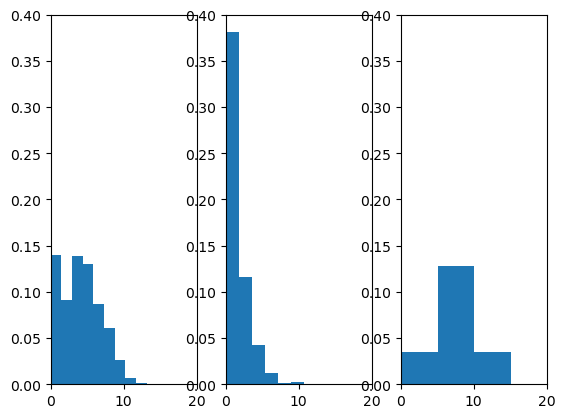

In [16]:
fig, axs = plt.subplots(1, 3)

axs[0].hist(volcanic_data[(volcanic_data['COMPOSITION']=='INTERMEDIATE')]['FEO'], density=True, label='Intermediate')
axs[1].hist(volcanic_data[(volcanic_data['COMPOSITION']=='FELSIC')]['FEO'], density=True, label='Felsic')
axs[2].hist(volcanic_data[(volcanic_data['COMPOSITION']=='MAFIC')]['FEO'], density=True, label='Mafic')

for ax in axs:
    ax.set_xlim(0,20)
    ax.set_ylim(0,.4)
    
plt.show()


<font color=goldenrod>**_Code for you to write_**</font>
- Plot a `sns.kdeplot` of `FEO` for `volcanic_data` where the `COMPOSITION` is `'INTERMEDIATE'`
- Plot a `sns.kdeplot` of `FEO` for `volcanic_data` where the `COMPOSITION` is `'FELSIC'`
- Plot a `sns.kdeplot` of `FEO` for `volcanic_data` where the `COMPOSITION` is `'MAFIC'`
- Plot these with `density=True`
-  Use `xlim` of 0 to 20
- Keep the number of bins the same for each
- Add labels and a legend
- Add x and y labels and a title

<Axes: >

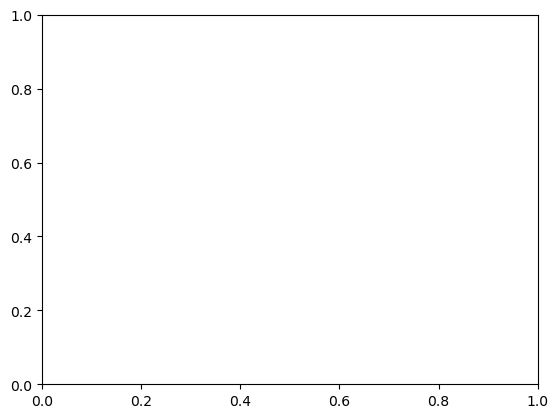

In [17]:
sns.kdeplot()

## Other way to visualize the distributions

### The box plot

> A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a **categorical variable**. A **categorial variable** is a classification, like Felsic or Intermediate, but not FeO, since that's a **continuous variable**.

> The **box shows the quartiles** of the
dataset while the **whiskers extend to show the rest of the distribution**. The remaining **points are determined to be "outliers"** using a method
that is a function of the inter-quartile range. *From seaborn docstring*

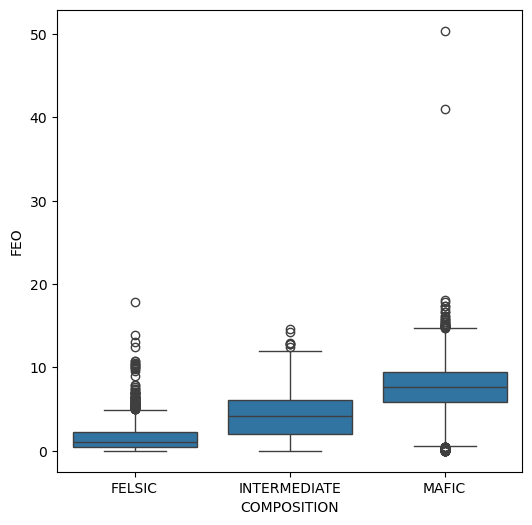

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(x="COMPOSITION", y="FEO", data=volcanic_data, order=['FELSIC','INTERMEDIATE','MAFIC'])
plt.show()

<font color=goldenrod>**_Code for you to write_**</font>
- Apply the function .unique() to the `ROCK NAME` column of `volcanic_data` so that you can see all the unique values that exist
- Plot a new box plot using `ROCK NAME` as the `x` value, `SIO2` as the `y` value, and choose three rock types to plot using the `order` list.


In [19]:
volcanic_data['ROCK NAME'].unique()

array(['BASALT', 'ANDESITE', 'RHYOLITE', 'THOLEIITE', 'DACITE', 'TUFF',
       nan, 'ALKALI BASALT', 'LATITE', 'NOT-GIVEN', 'PICRITE',
       'TRACHYBASALT', 'HAWAIITE', 'BASANITE', 'LAMPROITE', 'PHONOLITE',
       'MINETTE', 'DOLERITE', 'ABSAROKITE', 'SHOSHONITE',
       'BASALTIC-ANDESITE', 'LEUCITITE', 'TEPHRITE', 'LAMPROPHYRE',
       'PHONOTEPHRITE', 'KOMATIITE', 'SPILITE', 'TRACHYANDESITE',
       'NEPHELINITE', 'ANKARAMITE', 'BONINITE', 'FOIDITE', 'LIMBURGITE',
       'TEPHRIPHONOLITE', 'ICELANDITE', 'MELILITITE', 'KAMAFUGITE',
       'MUGEARITE', 'TRACHYTE', 'CARBONATITE', 'UGANDITE', 'MADUPITE',
       'DIABASE', 'PORPHYRITE', 'MALIGNITE', 'KIMBERLITE', 'CRINANITE',
       'MELILITOLITE', 'ANKARATRITE', 'MELAFOIDITE', 'KERATOPHYRE',
       'VITROPHERE', 'PYROCLASTIC-FALL', 'AGGLOMERATE', 'VOGESITE',
       'TRACHYDACITE', 'RHYODACITE', 'PYROCLASTIC-FLOW', 'DIORITE',
       'BENMOREITE', 'IGNIMBRITE', 'VITROPHYRE', 'COMENDITE', 'ADAKITE',
       'SPESSARTITE', 'TINGUAITE'], dty

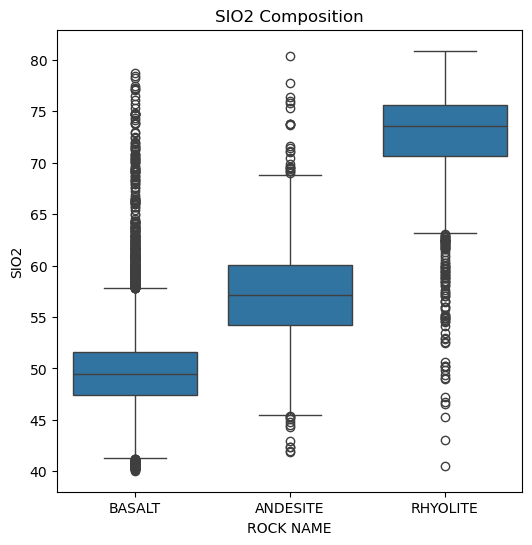

In [20]:
plt.figure(figsize=(6,6))
sns.boxplot(x="ROCK NAME", y="SIO2", data=volcanic_data, order=['BASALT', 'ANDESITE', 'RHYOLITE'])
plt.title('SIO2 Composition')
plt.show()

### Violin plot

Perhaps you like box plots, but you are also have a new-found love of probability density estimates. Well you are in luck as the violin plot puts them both together.

<font color=goldenrod>**_Code for you to write_**</font>
- Use `sns.violinplot` and the same syntax as above to replot your boxplot as a violin plot

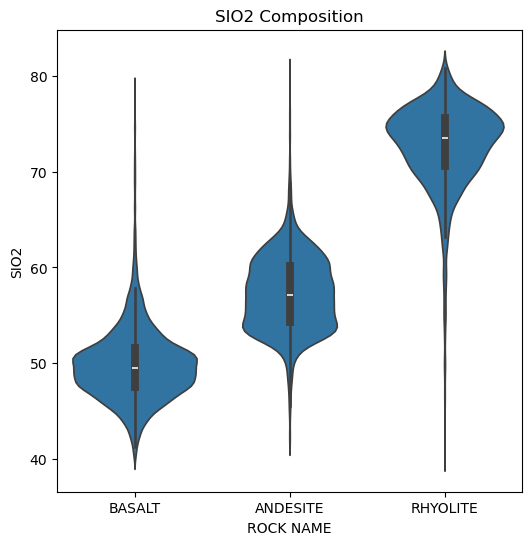

In [21]:
plt.figure(figsize=(6,6))
sns.violinplot(x="ROCK NAME", y="SIO2", data=volcanic_data, order=['BASALT', 'ANDESITE', 'RHYOLITE'])
plt.title('SIO2 Composition')
plt.show()

## Evaluating compositional differences between mafic, intermediate and felsic volcanics (sodium)

Looking at the these illustration of composition plot we see that it indicates that there is more iron in mafic rocks (which looks to be the case). It also indicated that there is more sodium in felsic rocks.

<img src="images/mafic_felsic.jpg" width = 600>

<font color=goldenrod>**_Code for you to write_**</font>

Since SiO2 is used to categorise rocks into felsic, intermediate, and mafic, we will use this variable.

Make the following continuous and categorical plots to evaluate the assertion that there is more sodium in felsic rocks:

To do this we will:
- Create a jointplot of NA2O vs SIO2 for the entire volcanic_data set with `kind=hex`
- Create a second jointplot of NA2O vs SIO2 for the entire volcanic_data set with `kind=kde`
- Compare the difference between these plots
- Create a violin plot of `NA2O` for the three different rock `COMPOSITIONS`, FELSIC, INTERMEDIATE, and MAFIC
- Evaluate your plots, is there more NA2O in more Felsic rocks?

In [22]:
sns.jointplot?

Signature:
sns.jointplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    kind='scatter',
    height=6,
    ratio=5,
    space=0.2,
    dropna=False,
    xlim=None,
    ylim=None,
    color=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    marginal_ticks=False,
    joint_kws=None,
    marginal_kws=None,
    **kwargs,
)
Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset that will be internally
    reshaped.
x, y : vectors or keys in ``data``
    Variables that s

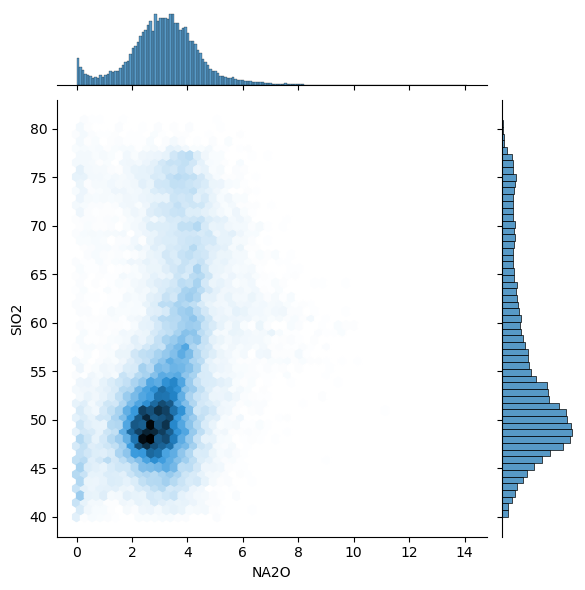

In [23]:
#kind='hex'
sns.jointplot(data=volcanic_data, x='NA2O', y='SIO2', kind='hex')

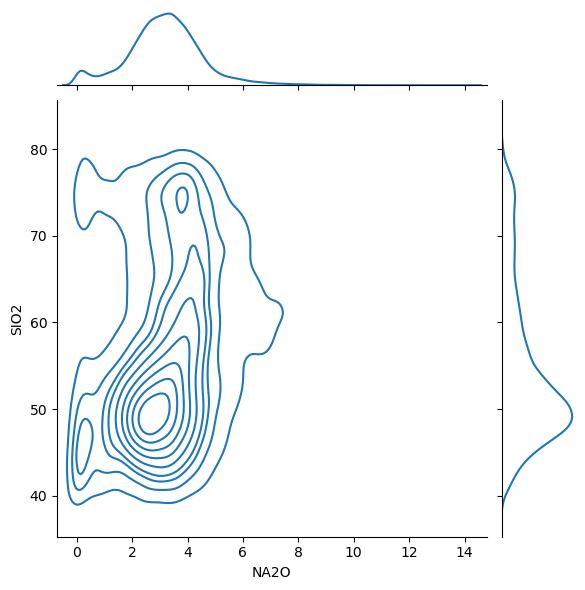

In [24]:
#kind='kde'
sns.jointplot(data=volcanic_data, x='NA2O', y='SIO2', kind='kde')

<font color=goldenrod>**_Code for you to write_**</font>

- violin plot of NA2O categorized by composition

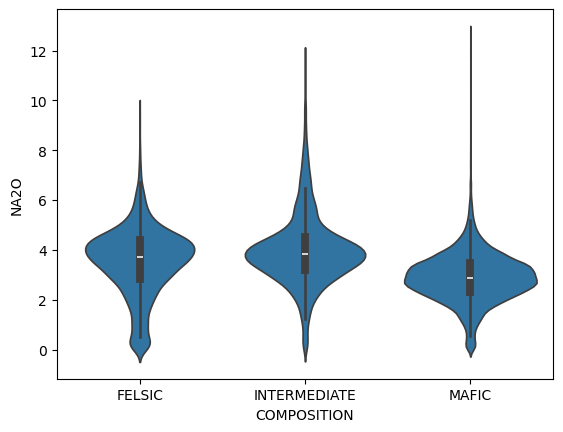

In [25]:
#violinplot
sns.violinplot(x="COMPOSITION", y="NA2O", data=volcanic_data, order=['FELSIC','INTERMEDIATE','MAFIC'])
plt.show()

<font color=goldenrod>**_Code for you to write_**</font>

Once you have made these visualizations, **calculate the mean NA2O in felsic, intermediate and mafic volcanics**. Assign these values to be `mafic_NA20_mean`, `intermediate_NA20_mean` and `felsic_NA20_mean` and print them.

In [26]:
mafic_NA20_mean = np.mean(volcanic_data[(volcanic_data['COMPOSITION']=='MAFIC')]['NA2O'])
intermediate_NA20_mean = np.mean(volcanic_data[(volcanic_data['COMPOSITION']=='INTERMEDIATE')]['NA2O'])
felsic_NA20_mean = np.mean(volcanic_data[(volcanic_data['COMPOSITION']=='FELSIC')]['NA2O'])

print('felsic mean NA20 = ', felsic_NA20_mean)
print('interm. mean NA20 = ', intermediate_NA20_mean)
print('mafic mean NA20 = ', mafic_NA20_mean)


felsic mean NA20 =  3.523135415441176
interm. mean NA20 =  3.9643710676156587
mafic mean NA20 =  2.884303237269773


**<font color=red> Question</font>** Do these values fit with the schematic illustration of the felsic/mafic diagram? What is consistent and what isn't?

**Write your answer in the box below**

<font color=blue>**__Answer: __**</font> They do. 


# A/B Testing 

> In modern data analytics, deciding whether two numerical samples come from the same underlying distribution is called A/B testing. The name refers to the labels of the two samples, A and B. 

> **The Hypotheses**

> We can try to answer this question by a test of hypotheses. The chance model that we will test says that there is no underlying difference in the popuations; the distributions in the samples are different just due to chance.

> Formally, this is the null hypothesis. We are going to have to figure out how to simulate a useful statistic under this hypothesis. But as a start, let's just state the two natural hypotheses.

*from https://www.inferentialthinking.com/chapters/12/1/AB_Testing.html*

In the example in Data 8, students are asked to consider the birth weight of babies when the mother was a smoker and when the mother was a nonsmoker. The two hypotheses and the test statistic were:

> **Null hypothesis**: In the population, the distribution of birth weights of babies is the same for mothers who don't smoke as for mothers who do. The difference in the sample is due to chance.

> **Alternative hypothesis**: In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.

> **Test Statistic**

> The alternative hypothesis compares the average birth weights of the two groups and says that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.

> We will do the subtraction in the order "average weight of the smoking group  − average weight of the non-smoking group". Small values (that is, large negative values) of this statistic will favor the alternative hypothesis.

We can use this same approach in considering the sodium content of the lava samples. where the **Null hypothesis** is that sodium content is the same for rocks of different compositions and in difference in the sample is the result of chance. The **Alternative hypothesis** is that the sodium content of felsic lavas is, on average, higher.

## Testing the null hypothesis that there is no difference in the sodium content of mafic and felsic lavas

To start with, let's consider the difference between mafic and felsic lavas.

<font color=goldenrod>**_Code for you to write_**</font>

- Filter the volcanic_data dataframe to **include mafic and felsic rocks**. This will be compositions that are felsic **or** mafic.
- Save this as `volcanic_felsic_mafic`
- Drop all columns except `COMPOSITION`, `SIO2`, and `NA2O`  by applying a `mask` consisting of a `list` of these columns. **Remember** that we use `[ ]` to specify a mask, and `[ ]` to specify a list
- Use the method `.dropna()` to remove NaN values
- Use `len` to check that your dataframe has 23,900 rows 

In [27]:
volcanic_felsic_mafic = volcanic_data[(volcanic_data['COMPOSITION']=='MAFIC')|(volcanic_data['COMPOSITION']=='FELSIC')]
print(volcanic_felsic_mafic['COMPOSITION'].unique()) ## Just to check to make sure we have only two
volcanic_felsic_mafic=volcanic_felsic_mafic[['COMPOSITION', 'SIO2', 'NA2O']]
volcanic_felsic_mafic=volcanic_felsic_mafic.dropna()
print(len(volcanic_felsic_mafic))

['MAFIC' 'FELSIC']
23900


We can define a mean NA2O value for each of these compositions. 

Our **test statistic** will be **the difference in the means** of these two compositions.

<font color=goldenrod>**_Code for you to write_**</font>
- calculate the mean NA2O for felsic rocks and save this as `felsic_NA20_mean`
- calculate the mean NA2O for mafic rocks and save this as `mafic_NA20_mean`
- print the difference between these two means

In [28]:
felsic_NA20_mean = np.mean(volcanic_felsic_mafic[volcanic_felsic_mafic['COMPOSITION']=='FELSIC']['NA2O'])
mafic_NA20_mean = np.mean(volcanic_felsic_mafic[volcanic_felsic_mafic['COMPOSITION']=='MAFIC']['NA2O'])

print(felsic_NA20_mean - mafic_NA20_mean)

0.6388321781714041


Let's define a function that can make this calculation and make a function for **mean difference**.

What information would we need to pass to the function to do this?

<font color=goldenrod>**_Code for you to write_**</font>
- Define a function called `difference_of_means`
- It give the code the arguments necessary to calculate the difference between the means of some continuous variable for two different categories
- Calculate the two means
- Return the difference between the means

In [29]:
def difference_of_means(df, mask_column, mask_values, test_var):
    '''
    calculates the two means between two columns and returns the differnce

    params:
        df(pandas dataframe) - dataframe
        mask_column(str) - name of masking column.
        mask_values(list) - list of values you are interested in
        test_var(str) - name of the test variable you want the means of

    returns:
        difference between the two means
    
    '''
    
    try:
        type_1_mean = np.mean(df[df[mask_column]==mask_values[0]][test_var])
        type_2_mean = np.mean(df[df[mask_column]==mask_values[1]][test_var])
        return (type_1_mean -type_2_mean)
    except NameError:
        print("Your dataframe was not found.")
    except IndexError:
        print("Make sure you add TWO mask values.")
    except KeyError:
        print("Your dataframe's columns was not found. Check your mask column or test column.")
    except Exception as e:
        print(f"An error occurred: {e}")

difference_of_means(df = volcanic_felsic_mafic, mask_column='COMPOSITION', mask_values=['FELSIC', 'MAFIC'], test_var='NA2O')
    

np.float64(0.6388321781714041)

<font color=goldenrod>**_Code for you to write_**</font>

Create a second function called `difference_of_medians` that can calculate the difference of the medians. Use `np.median` and the format from the function above.

In [30]:
def difference_of_medians(df, mask_column, mask_values, test_var):
    '''
    calculates the two medians between two columns and returns the differnce

    params:
        df(pandas dataframe) - dataframe
        mask_column(str) - name of masking column.
        mask_values(list) - list of values you are interested in
        test_var(str) - name of the test variable you want the means of

    returns:
        difference between the two means
    
    '''
    
    try:
        type_1_mean = np.median(df[df[mask_column]==mask_values[0]][test_var])
        type_2_mean = np.median(df[df[mask_column]==mask_values[1]][test_var])
        return (type_1_mean -type_2_mean)
    except NameError:
        print("Your dataframe was not found.")
    except IndexError:
        print("Make sure you add TWO mask values.")
    except KeyError:
        print("Your dataframe's columns was not found. Check your mask column or test column.")
    except Exception as e:
        print(f"An error occurred: {e}")

difference_of_medians(df = volcanic_felsic_mafic, mask_column='COMPOSITION', mask_values=['FELSIC', 'MAFIC'], test_var='NA2O')
    

np.float64(0.8300000000000001)

We can now use this to calculate the mean and median differences between **felsic and mafic** rocks for when comparing the **NA2O composition** data.

In [31]:
felsic_mafic_mean_diff = difference_of_means(volcanic_felsic_mafic,'COMPOSITION',['FELSIC','MAFIC'],'NA2O')
print(felsic_mafic_mean_diff)
flip_felsic_mafic_mean_diff = difference_of_means(volcanic_felsic_mafic,'COMPOSITION',['MAFIC','FELSIC'],'NA2O')
print(flip_felsic_mafic_mean_diff)

0.6388321781714041
-0.6388321781714041


In [32]:
felsic_mafic_median_diff = difference_of_medians(volcanic_felsic_mafic,'COMPOSITION',['FELSIC','MAFIC'],'NA2O')
felsic_mafic_median_diff

np.float64(0.8300000000000001)

## Testing the null hypothesis through random permutation

The difference of the means suggests that the alternative hypothesis that felsic lavas have more sodium on average is true. How can we test that this is not the result of chance?

> **Predicting the Statistic Under the Null Hypothesis**

> To see how the statistic should vary under the null hypothesis, we have to figure out how to simulate the statistic under that hypothesis. A clever method based on random permutations does just that

If there were no difference between the two distributions in the underlying population, then whether the sodium content is from a mafic or a felsic rock should make no difference to the average. **The idea, then, is to shuffle all the labels randomly among the rock samples. This is called random permutation.**

We can do this using the `np.random.permutation` function applied to our dataframe. We have to use the `.values` method to get the numbers out of the **pandas** dataframe so that the **numpy** `random.permutation` function can reshuffle them.



In [33]:
np.random.permutation(volcanic_felsic_mafic['COMPOSITION'].values)

array(['MAFIC', 'MAFIC', 'MAFIC', ..., 'MAFIC', 'MAFIC', 'MAFIC'],
      shape=(23900,), dtype=object)

<font color=goldenrod>**_Code for you to write_**</font>

- Save this to create a new column in the dataframe called `COMPOSITION_Shuffled`
- Use `tail` or `head` to show the result

In [34]:
volcanic_felsic_mafic['COMPOSITION_Shuffled']=np.random.permutation(volcanic_felsic_mafic['COMPOSITION'].values)

<font color=goldenrod>**_Code for you to write_**</font>

Now use the **difference_of_means** function on the 'COMPOSITION_Shuffled' category column and the **NA2O** value to find the difference when the **felsic** and **mafic** rocks are mixed together.

In [35]:
volcanic_felsic_mafic

,COMPOSITION,SIO2,NA2O,COMPOSITION_Shuffled
0,MAFIC,49.97,2.24,FELSIC
4,MAFIC,49.90,2.76,MAFIC
5,MAFIC,49.90,3.77,MAFIC
14,MAFIC,49.90,4.49,MAFIC
16,MAFIC,49.90,5.10,MAFIC
...,...,...,...,...
66051,FELSIC,67.77,5.17,MAFIC
66052,FELSIC,67.56,6.12,MAFIC
66053,FELSIC,67.39,4.98,MAFIC
66055,FELSIC,63.99,4.67,MAFIC


In [36]:
#difference_of_means (dataframe,category_column,category_values,test_value)
#    dataframe : the pandas dataframe containing the data
#    category_column : the column that will be used to categorize the data (a string)
#    category_values_1 : the values of the first category 
#    category_values_2 : the values of the second category 
#    test_value : the column for which the mean will be calculated (a string)
difference_of_means(volcanic_felsic_mafic,'COMPOSITION_Shuffled',['FELSIC','MAFIC'],'NA2O')

np.float64(0.013163193273612706)

The above difference is the result of one random permutation. We want to do many random permutations to test the hypothesis. **We will save the outputs of the difference of the means and the medians to two lists.** This may take some time.

<font color=goldenrod>**_Code for you to write_**</font>
- Create an empty list for the difference of the means
- Create an empty list for the difference of the medians
- Loop over 5 repetitions
- For each repetition:
   - Reshuffle the data and save to the `COMPOSITION_Shuffled` column
   - Calculate the difference of the means
   - Append this to the list
   - Calculate the difference of the medians
   - Append this to the list

In [37]:
def shuffle():
    volcanic_felsic_mafic['COMPOSITION_Shuffled']=np.random.permutation(volcanic_felsic_mafic['COMPOSITION'].values)

list_of_means = []
list_of_medians = []
shuffles = 1000

for i in range(shuffles):
    shuffle()
    list_of_means.append(difference_of_means(volcanic_felsic_mafic,'COMPOSITION_Shuffled',['FELSIC','MAFIC'],'NA2O'))
    list_of_medians.append(difference_of_medians(volcanic_felsic_mafic,'COMPOSITION_Shuffled',['FELSIC','MAFIC'],'NA2O'))
    
# print(list_of_means)
# print(list_of_medians)


<font color=goldenrod>**_Code for you to write_**</font>

Now let's plot the mean and median as histograms.

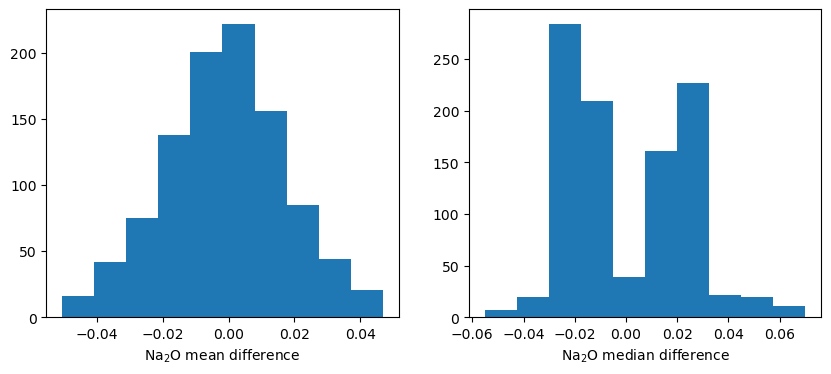

In [38]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(list_of_means,label='permutations')
plt.xlabel('Na$_2$O mean difference')

plt.subplot(1,2,2)
plt.hist(list_of_medians,label='permutations')
plt.xlabel('Na$_2$O median difference')

plt.show()

Notice how the distributions are centered around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

## Comparing the random permutations to the actual difference

Now we plot the random permutations versus the non-randomised differences we calculated earlier.

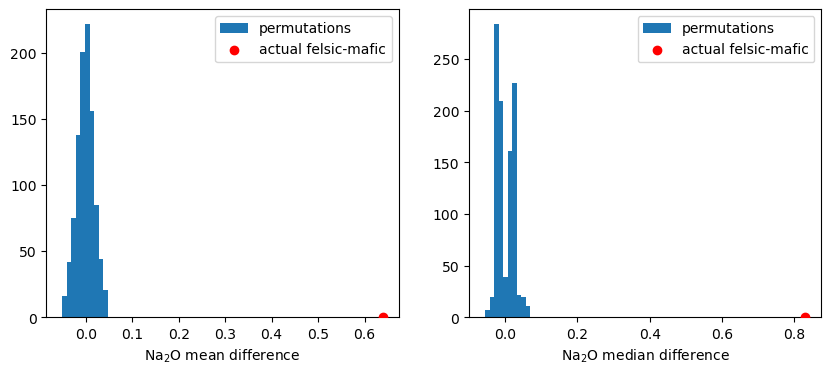

In [39]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(list_of_means,label='permutations')
plt.scatter(felsic_mafic_mean_diff,0,color='red',zorder=1000,label='actual felsic-mafic')
plt.xlabel('Na$_2$O mean difference')
plt.legend()

plt.subplot(1,2,2)
plt.hist(list_of_medians,label='permutations')
plt.scatter(felsic_mafic_median_diff,0,color='red',zorder=1000,label='actual felsic-mafic')
plt.xlabel('Na$_2$O median difference')
plt.legend()
plt.show()

<font color=red>**_Discussion Question_**</font>

Do the real differences match the reshuffled data?

### P-values

We can calculate an empirical P-value (probability) by determining the **proportion of the random permutations that have a greater difference than the real data**.

In [40]:
mean_empirical_p = np.count_nonzero(dif_permuations_fel_maf_mean >= felsic_mafic_mean_diff) / repetitions
mean_empirical_p

NameError: name 'dif_permuations_fel_maf_mean' is not defined

In [ ]:
median_empirical_p = np.count_nonzero(dif_permuations_fel_maf_median >= felsic_mafic_median_diff) / repetitions
median_empirical_p

The empirical P-values are 0, meaning that none of the 1,000 permuted samples resulted in a difference that was as large as that which is observed in the actual samples. This is only an approximation. The exact chance of getting a difference in that range is not 0, but it is vanishingly small.

So it appears to be well-supported that felsic magmas have more Na$_2$O than mafic magmas.

## Testing the null hypothesis that there is no difference in the sodium content of intermediate and felsic lavas

In [ ]:
volcanic_felsic_int = volcanic_data[(volcanic_data['COMPOSITION']=='FELSIC') | (volcanic_data['COMPOSITION']=='INTERMEDIATE')]
volcanic_felsic_int = volcanic_felsic_int[(volcanic_felsic_int['SIO2'] < 64) & (volcanic_felsic_int['SIO2'] > 51)]
volcanic_felsic_int = volcanic_felsic_int[['COMPOSITION','SIO2','NA2O']]
volcanic_felsic_int = volcanic_felsic_int.dropna()
volcanic_felsic_int.tail()

<font color=goldenrod>**_Code for you to write_**</font>

Calculate the actual difference of means of NA2O between Felsic and Intermediate rocks for the real data

<font color=goldenrod>**_Code for you to write_**</font>

Calculate the actual difference of medians of NA2O between Felsic and Intermediate rocks for the real data

<font color=goldenrod>**_Code for you to write_**</font>

Shuffle the compositions within the `volcanic_felsic_int` dataframe. Do it 1000 times and make histogrames of the mean and median of these permutations that includes the actual median and mean that you calculated

Plot the histograms of the mean and median, like above.

<font color=goldenrod>**_Code for you to write_**</font>

Calculate the p-value for the median and mean

<font color=red>**_Discussion Question_**</font>

Is there a a difference between the sodium contents of felsic and intermediate volcanic rocks or is the null hypothesis that this is no difference true?


### Turn in this notebook

Save your completed notebook.